<a href="https://colab.research.google.com/github/michaelb3245/DSRP--MichaelBriglall/blob/main/Gallstone_Dataset_Michael_Briglall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Among individuals with gallstones, what is the average BMI? Is it significantly different from those without gallstones?

In [1]:
import statsmodels.stats.multicomp as mc

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
path = "/content/drive/MyDrive/Gallstone Dataset - Michael Briglall/dataset-uci (3).csv"
df = pd.read_csv(path)
df.head(5)

,Unnamed: 0,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,1,0,50,0,0,0,0,0,0,185,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,2,0,47,0,1,0,0,0,0,176,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,3,0,61,0,0,0,0,0,0,171,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,4,0,41,0,0,0,0,0,0,168,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,5,0,42,0,0,0,0,0,0,178,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [6]:
df["Gender"].value_counts()

,count
Gender,
0,162
1,157


In [7]:
df["Gallstone Status"].value_counts()

,count
Gallstone Status,
0,161
1,158


In [8]:
df[df.duplicated()]

,Unnamed: 0,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.dtypes

,0
Unnamed: 0,int64
Gallstone Status,int64
Age,int64
Gender,int64
Comorbidity,int64
Coronary Artery Disease (CAD),int64
Hypothyroidism,int64
Hyperlipidemia,int64
Diabetes Mellitus (DM),int64
Height,int64


In [11]:
df.info

<bound method DataFrame.info of      Unnamed: 0  Gallstone Status  Age  Gender  Comorbidity  \
0             1                 0   50       0            0   
1             2                 0   47       0            1   
2             3                 0   61       0            0   
3             4                 0   41       0            0   
4             5                 0   42       0            0   
..          ...               ...  ...     ...          ...   
314         315                 1   49       0            0   
315         316                 1   31       1            0   
316         317                 1   58       0            0   
317         318                 1   37       1            0   
318         319                 1   60       1            0   

     Coronary Artery Disease (CAD)  Hypothyroidism  Hyperlipidemia  \
0                                0               0               0   
1                                0               0               0   
2                                0               0               0   
3                                0               0               0   
4                                0               0               0   
..                             ...             ...             ...   
314                              0               0               0   
315                              0               0               0   
316                              0               0               0   
317                              0               0               0   
318                              0               0               0   

     Diabetes Mellitus (DM)  Height  ...  High Density Lipoprotein (HDL)  \
0                         0     185  ...                            40.0   
1                         0     176  ...                            43.0   
2                         0     171  ...                            43.0   
3                         0     168  ...                            59.0   
4                         0     178  ...                            30.0   
..                      ...     ...  ...                             ...   
314                       0     178  ...                            55.0   
315                       0     157  ...                            58.0   
316                       0     172  ...                            45.0   
317                       0     177  ...                            33.0   
318                       0     154  ...                           273.0   

     Triglyceride  Aspartat Aminotransferaz (AST)  \
0           134.0                            20.0   
1           103.0                            14.0   
2            69.0                            18.0   
3            53.0                            20.0   
4           326.0                            27.0   
..            ...                             ...   
314          81.0                            28.0   
315          64.0                            24.0   
316         168.0                            21.0   
317         253.0                            40.0   
318          19.0                            25.0   

     Alanin Aminotransferaz (ALT)  Alkaline Phosphatase (ALP)  Creatinine  \
0                            22.0                        87.0        0.82   
1                            13.0                        46.0        0.87   
2                            14.0                        66.0        1.25   
3                            12.0                        34.0        1.02   
4                            54.0                        71.0        0.82   
..                            ...                         ...         ...   
314                          50.0                        90.0        0.98   
315                          16.0                        38.0        0.50   
316                          27.0                        94.0        1.04   
317                          22.0                 

In [12]:
categorical_columns = ['Gallstone Status', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)',
                       'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)',
                       'Visceral Fat Rating (VFR)', 'Hepatic Fat Accumulation (HFA)']

In [13]:
category_mappings = {
    'Gallstone Status': {0: 'No Gallstones', 1: 'Gallstones'},
    'Gender': {0: 'Female', 1: 'Male'},
    'Comorbidity': {0: 'No Comorbidity', 1: 'Comorbidity'},
    'Coronary Artery Disease (CAD)': {0: 'No CAD', 1: 'CAD'},
    'Hypothyroidism': {0: 'No Hypothyroidism', 1: 'Hypothyroidism'},
    'Hyperlipidemia': {0: 'No Hyperlipidemia', 1: 'Hyperlipidemia'},
    'Diabetes Mellitus (DM)': {0: 'No DM', 1: 'DM'},
    'Hepatic Fat Accumulation (HFA)': {0: 'Normal', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}
}

In [14]:
for column, mapping in category_mappings.items():
  if column in df.columns:
    df[column] = df[column].map(mapping)
    df[column] = df[column].astype("category")

In [15]:
df.head()

,Unnamed: 0,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,1,No Gallstones,50,Female,No Comorbidity,No CAD,No Hypothyroidism,No Hyperlipidemia,No DM,185,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,2,No Gallstones,47,Female,Comorbidity,No CAD,No Hypothyroidism,No Hyperlipidemia,No DM,176,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,3,No Gallstones,61,Female,No Comorbidity,No CAD,No Hypothyroidism,No Hyperlipidemia,No DM,171,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,4,No Gallstones,41,Female,No Comorbidity,No CAD,No Hypothyroidism,No Hyperlipidemia,No DM,168,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,5,No Gallstones,42,Female,No Comorbidity,No CAD,No Hypothyroidism,No Hyperlipidemia,No DM,178,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [16]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    print("Dropped 'Unnamed: 0' column.\n")

Dropped 'Unnamed: 0' column.



In [17]:
df.head()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,No Gallstones,50,Female,No Comorbidity,No CAD,No Hypothyroidism,No Hyperlipidemia,No DM,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,No Gallstones,47,Female,Comorbidity,No CAD,No Hypothyroidism,No Hyperlipidemia,No DM,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,No Gallstones,61,Female,No Comorbidity,No CAD,No Hypothyroidism,No Hyperlipidemia,No DM,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,No Gallstones,41,Female,No Comorbidity,No CAD,No Hypothyroidism,No Hyperlipidemia,No DM,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,No Gallstones,42,Female,No Comorbidity,No CAD,No Hypothyroidism,No Hyperlipidemia,No DM,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [18]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
    print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows: 0


In [19]:
average_bmi = df.groupby('Gallstone Status')['Body Mass Index (BMI)'].mean().reset_index()
average_bmi.columns = ['Gallstone Status', 'Average BMI']

/tmp/ipython-input-19-392615989.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_bmi = df.groupby('Gallstone Status')['Body Mass Index (BMI)'].mean().reset_index()


In [20]:
desired_order = ['No Gallstones', 'Gallstones']
average_bmi['Gallstone Status'] = pd.Categorical(average_bmi['Gallstone Status'], categories=desired_order, ordered=True)
average_bmi = average_bmi.sort_values('Gallstone Status')

In [21]:
average_bmi['Gallstone Status'] = average_bmi['Gallstone Status'].astype(str)

In [22]:
average_bmi['Average BMI'] = average_bmi['Average BMI'].round(2)

Text(0, 0.5, 'Average Body Mass Index (BMI)')

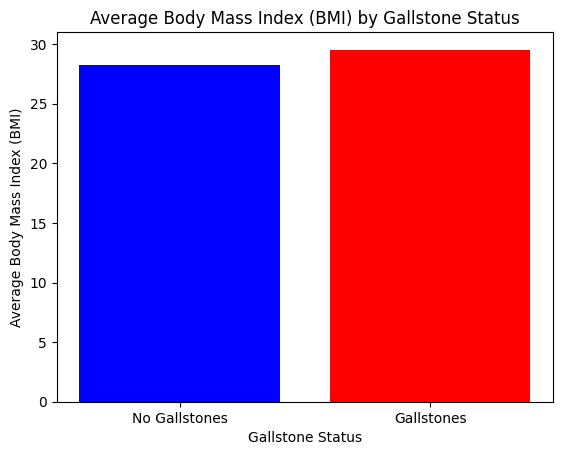

In [23]:
bars = plt.bar(average_bmi["Gallstone Status"], average_bmi["Average BMI"], color=['blue', 'red'])
plt.title("Average Body Mass Index (BMI) by Gallstone Status")
plt.xlabel("Gallstone Status")
plt.ylabel("Average Body Mass Index (BMI)")

1. Check for duplicate rows.
2. Verify Data types and Encoding.
3. Identify Outliers.
4. Scale or Normalize continuous features.
5. Feature Consistency Check: Look for low varience features, look at correlation, assess feature redundancy.
6.Target/Label is having correct values (0/1)
7. Ensure all your numerical features are having consistent units (cholesterol in mg/dL, GFR mL)
8. Units/ranges documentation.
9. Maintain clarity and reproductibility.
10. Crosscheck against dataset documentation.